In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from sklearn.metrics import accuracy_score
import seaborn as sb #biblioteka z heatmapem
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
#-------------------------------------------------------------------------------
#wczytywanie danych
#-------------------------------------------------------------------------------
data = pd.read_csv('../../animals.csv', sep=",") #dane pożyczone od Wasiluka, bo miał je od razu w CSV
data

war  fly  ver  end  gro  hai
ant    1    1    1    1    2    1
bee    1    2    1    1    2    2
cat    2    1    2    1    1    2
cpl    1    1    1    1    1    2
chi    2    1    2    2    2    2
cow    2    1    2    1    2    2
duc    2    2    2    1    2    1
eag    2    2    2    2    1    1
ele    2    1    2    2    2    1
fly    1    2    1    1    1    1
fro    1    1    2    2    0    1
her    1    1    2    1    2    1
lio    2    1    2    0    2    2
liz    1    1    2    1    1    1
lob    1    1    1    1    0    1
man    2    1    2    2    2    2
rab    2    1    2    1    2    2
sal    1    1    2    1    0    1
spi    1    1    1    0    1    2
wha    2    1    2    2    2    1

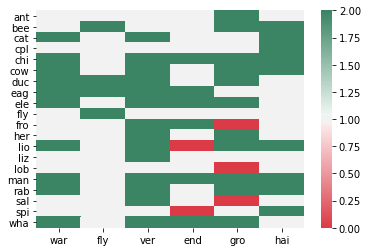

In [4]:
#-------------------------------------------------------------------------------
#heatmap
#-------------------------------------------------------------------------------
palette = sb.diverging_palette(10, 150, as_cmap=True) #customowa paleta kolorów
heat_map = sb.heatmap(data, cmap=palette)
plt.show()

In [21]:
#-------------------------------------------------------------------------------
#iris i k-średnich
#-------------------------------------------------------------------------------

#wczytanie
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_classes = pd.DataFrame(iris.target)
iris_classes.columns = ['class']

#przerabiamy dane aby je potem pomiksować
iris_array = iris_data.to_numpy()

#sety "podwójne"
twoVarScore = [];
for i in range(4):
    for j in range(4):
        if j>i:
            twoVariables = np.vstack((iris_array[:,i], iris_array[:,j])).T
            kmeans = KMeans(n_clusters=3).fit(twoVariables)
            twoVarScore.append(kmeans.score(twoVariables))

#sety "potrójne"
threeVarScore = [];
for i in range(4):
    for j in range(4):
        for k in range(4):
            if j>i and k>j:
                threeVariables = np.vstack((iris_array[:,i], iris_array[:,j], iris_array[:,k])).T
                kmeans = KMeans(n_clusters=3).fit(threeVariables)
                threeVarScore.append(kmeans.score(threeVariables))
            
#pełen set (4 zmienne)
kmeans = KMeans(n_clusters=3).fit(iris_array)
fourVarScore = kmeans.score(iris_array)
        

[-37.05070213 -53.80997864 -32.72652616 -40.73707409 -20.60239595
 -31.37135897 -69.42973924 -48.66078454 -63.34211851 -47.86642906
 -78.85144143]


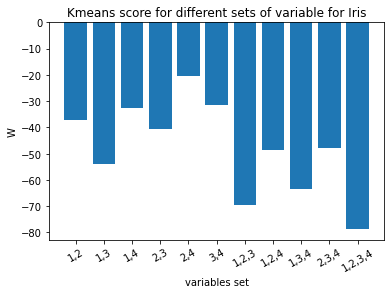

In [34]:
#-------------------------------------------------------------------------------
#wizualka
#-------------------------------------------------------------------------------

allScore = np.hstack((twoVarScore,threeVarScore,fourVarScore)) 

#1,2 to zmienne z kolumn 1 i 2, 1,3 z kolumn 1 i 3 itd.
binLabels = ['1,2','1,3','1,4','2,3','2,4','3,4','1,2,3','1,2,4','1,3,4','2,3,4','1,2,3,4']
print(allScore)

index = np.arange(len(binLabels))
plt.bar(index, allScore)
plt.xlabel('variables set', fontsize=10)
plt.ylabel('W', fontsize=10)
plt.xticks(index, binLabels, fontsize=10, rotation=30)
plt.title('Kmeans score for different sets of variable for Iris')
plt.show()

#tutaj im mniejsze W tym lepsza dokładność klasyfikatora, dlatego tak troche dziwnie